In [1]:
#import modules
import pandas as pd
import geocoder

In [2]:
#download contents of webpage
url = "https://en.wikipedia.org/wiki/List_of_Perth_suburbs"

#create a list of all the tables on the webpage
dfs = pd.read_html(url)

#Get the third table in the list and convert it to a dataframe
df = dfs[2]
df

,Suburb,Local government area
0,Alexander Heights,Wanneroo
1,Alfred Cove,Melville
2,Alkimos,Wanneroo
3,Anketell,Kwinana
4,Applecross,Melville
...,...,...
350,Wooroloo,Mundaring
351,Wungong,Armadale
352,Yanchep,Wanneroo
353,Yangebup,Cockburn


In [3]:
#Get Lattitude and Longitude of suburbs
suburb = df['Suburb']

latitude = []
longitude = []
n = 0

while n < len(suburb):
    g = geocoder.arcgis('{}, Perth, Western Australia'.format(suburb[n]))
    lat_lng_coords = g.latlng
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    n = n + 1

df['Latitude'] = latitude
df['Longitude'] = longitude

df.head()

,Suburb,Local government area,Latitude,Longitude
0,Alexander Heights,Wanneroo,-31.83101,115.85356
1,Alfred Cove,Melville,-32.03119,115.81566
2,Alkimos,Wanneroo,-31.61629,115.68792
3,Anketell,Kwinana,-32.21018,115.85172
4,Applecross,Melville,-32.01033,115.83483


In [5]:
# Define Foursquare credentials
CLIENT_ID = ''
CLIENT_SECRET = ''
ACCESS_TOKEN = ''
VERSION = '20180605'
LIMIT = 100 

In [6]:
#Function to get data off Foursquare within 1km of each suburbs lat/long

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
#Run Function to get venues
import requests

perth_venues = getNearbyVenues(names=df['Suburb'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Alexander Heights
Alfred Cove
Alkimos
Anketell
Applecross
Ardross
Armadale
Ascot
Ashby
Ashendon
Ashfield
Attadale
Atwell
Aubin Grove
Aveley
Bailup
Balcatta
Baldivis
Balga
Ballajura
Banjup
Banksia Grove
Baskerville
Bassendean
Bateman
Bayswater
Beaconsfield
Beckenham
Bedford
Bedfordale
Beechboro
Beechina
Beeliar
Beldon
Belhus
Bellevue
Belmont
Bentley
Bennett Springs
Bertram
Bibra Lake
Bickley
Bicton
Booragoon
Boya
Brabham
Brentwood
Brigadoon
Brookdale
Bull Creek
Bullsbrook
Burns Beach
Burswood
Butler
Byford
Calista
Camillo
Canning Mills
Canning Vale
Cannington
Carabooda
Cardup
Carine
Carlisle
Carmel
Carramar
Casuarina
Caversham
Champion Lakes
Chidlow
Churchlands
City Beach
Claremont
Clarkson
Cloverdale
Cockburn Central
Como
Connolly
Coogee
Coolbellup
Coolbinia
Cooloongup
Cottesloe
Craigie
Crawley
Cullacabardee
Currambine
Daglish
Dalkeith
Darch
Darling Downs
Darlington
Dayton
Dianella
Doubleview
Duncraig
East Cannington
East Fremantle
East Perth
East Rockingham
East Victoria Park
Eden Hil

In [8]:
#view first 5 rows of new dataframe
perth_venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alexander Heights,-31.83101,115.85356,Domino's Pizza,-31.830509,115.853342,Pizza Place
1,Alexander Heights,-31.83101,115.85356,Coles,-31.830137,115.854053,Supermarket
2,Alexander Heights,-31.83101,115.85356,Alexander Heights Shopping Centre,-31.829769,115.853448,Shopping Mall
3,Alexander Heights,-31.83101,115.85356,Red Rooster,-31.830807,115.853138,Fast Food Restaurant
4,Alexander Heights,-31.83101,115.85356,Woolworths,-31.826764,115.852742,Supermarket


In [9]:
#filter the dataframe to venues categories that are parks, shopping malls or chinese restaraunts
perth_venues_filter = perth_venues[(perth_venues['Venue Category'] == 'Park') |
                      (perth_venues['Venue Category'] == 'Shopping Mall') |
                      (perth_venues['Venue Category'] == 'Chinese Restaurant')]

perth_venues_filter.reset_index(drop=True)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alexander Heights,-31.83101,115.85356,Alexander Heights Shopping Centre,-31.829769,115.853448,Shopping Mall
1,Alexander Heights,-31.83101,115.85356,Frangipani Park,-31.826773,115.852711,Park
2,Alfred Cove,-32.03119,115.81566,Tompkins Park,-32.028198,115.819373,Park
3,Alfred Cove,-32.03119,115.81566,Mick Jahn Reserve,-32.030594,115.810032,Park
4,Alfred Cove,-32.03119,115.81566,Palmyra Rugby Union Club,-32.028001,115.820298,Park
...,...,...,...,...,...,...,...
322,Woodvale,-31.79720,115.79721,Timberlane Park,-31.794189,115.798194,Park
323,Woodvale,-31.79720,115.79721,Lotus Court,-31.799988,115.793907,Chinese Restaurant
324,Wooroloo,-31.80459,116.30853,Ron Evans Park,-31.801664,116.316711,Park
325,Yanchep,-31.54987,115.63637,Yanchep Central Shopping Centre,-31.549654,115.638901,Shopping Mall


In [10]:
#One hot encoding of data
perth_onehot = pd.get_dummies(perth_venues_filter[['Venue Category']], prefix="", prefix_sep="")

#add suburb column back to dataframe
perth_onehot['Suburb'] = perth_venues_filter['Suburb']

# move suburb column to the first column
hood = perth_onehot['Suburb']
perth_onehot.drop(labels=['Suburb'], axis=1,inplace = True)
perth_onehot.insert(0, 'Suburb', hood)

perth_onehot.reset_index(drop=True)

,Suburb,Chinese Restaurant,Park,Shopping Mall
0,Alexander Heights,0,0,1
1,Alexander Heights,0,1,0
2,Alfred Cove,0,1,0
3,Alfred Cove,0,1,0
4,Alfred Cove,0,1,0
...,...,...,...,...
322,Woodvale,0,1,0
323,Woodvale,1,0,0
324,Wooroloo,0,1,0
325,Yanchep,0,0,1


In [15]:
#group rows by suburb
perth_grouped = perth_onehot.groupby('Suburb').sum().reset_index()
perth_grouped.head()

,Suburb,Chinese Restaurant,Park,Shopping Mall
0,Alexander Heights,0,1,1
1,Alfred Cove,0,4,2
2,Alkimos,0,2,0
3,Applecross,0,3,0
4,Ardross,0,1,0


In [16]:
#Run k-means clustering
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

perth_grouped_clustering = perth_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(perth_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 4, 4, 3, 1, 3, 3, 3, 3])

In [17]:
# add clustering labels
perth_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

#merge clusterred datframe with original data to get coords
perth_merged = df
perth_merged = perth_merged.join(perth_grouped.set_index('Suburb'), on='Suburb')

#drop suburbs with no parks chinese restaraunts or shopping malls
perth_merged.dropna(subset=['Chinese Restaurant','Park', 'Shopping Mall'], inplace=True)
perth_merged.reset_index(drop=True)
perth_merged.tail()

,Suburb,Local government area,Latitude,Longitude,Cluster Labels,Chinese Restaurant,Park,Shopping Mall
348,Woodlands,Stirling,-31.90005,115.78958,1.0,0.0,0.0,1.0
349,Woodvale,Joondalup; Wanneroo,-31.79720,115.79721,0.0,1.0,1.0,0.0
350,Wooroloo,Mundaring,-31.80459,116.30853,3.0,0.0,1.0,0.0
352,Yanchep,Wanneroo,-31.54987,115.63637,1.0,0.0,0.0,1.0
354,Yokine,Stirling,-31.90151,115.85061,1.0,0.0,0.0,1.0


In [105]:
#create map to view clusters
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import numpy as np

address = 'Perth, Western Australia'

geolocator = Nominatim(user_agent="perth_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(perth_merged['Latitude'], perth_merged['Longitude'], perth_merged['Suburb'], perth_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
   
map_clusters

In [79]:
#group clusters by mean to create mean plot
cluster_mean = perth_merged.groupby('Cluster Labels').mean().reset_index()
cluster_mean = pd.DataFrame(cluster_mean, columns = ['Cluster Labels','Chinese Restaurant', 'Park', 'Shopping Mall'])
cluster_mean.set_index('Cluster Labels',inplace=True)
cluster_mean

,Chinese Restaurant,Park,Shopping Mall
Cluster Labels,,,
0.0,1.128205,0.461538,0.307692
1.0,0.000000,0.181818,1.090909
2.0,2.375000,1.000000,1.625000
3.0,0.000000,1.000000,0.000000
4.0,0.090909,2.272727,0.303030


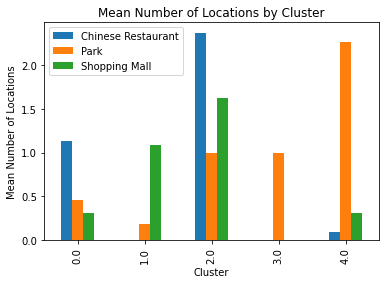

In [80]:
#create mean bar plot 
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

cluster_mean.plot(kind='bar')

plt.title('Mean Number of Locations by Cluster')
plt.ylabel('Mean Number of Locations')
plt.xlabel('Cluster')

plt.show()

In [83]:
#group clusters by max to create max plot
cluster_max = perth_merged.groupby('Cluster Labels').max().reset_index()
cluster_max = pd.DataFrame(cluster_max, columns = ['Cluster Labels','Chinese Restaurant', 'Park', 'Shopping Mall'])
cluster_max.set_index('Cluster Labels',inplace=True)
cluster_max

,Chinese Restaurant,Park,Shopping Mall
Cluster Labels,,,
0.0,2.0,1.0,1.0
1.0,0.0,1.0,2.0
2.0,3.0,2.0,2.0
3.0,0.0,1.0,0.0
4.0,1.0,5.0,2.0


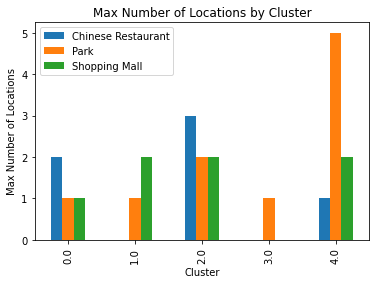

In [84]:
#create mean bar plot 
cluster_max.plot(kind='bar')

plt.title('Max Number of Locations by Cluster')
plt.ylabel('Max Number of Locations')
plt.xlabel('Cluster')

plt.show()

In [85]:
#group clusters by min to create min plot
cluster_min = perth_merged.groupby('Cluster Labels').min().reset_index()
cluster_min = pd.DataFrame(cluster_min, columns = ['Cluster Labels','Chinese Restaurant', 'Park', 'Shopping Mall'])
cluster_min.set_index('Cluster Labels',inplace=True)
cluster_min

,Chinese Restaurant,Park,Shopping Mall
Cluster Labels,,,
0.0,1.0,0.0,0.0
1.0,0.0,0.0,1.0
2.0,1.0,0.0,1.0
3.0,0.0,1.0,0.0
4.0,0.0,2.0,0.0


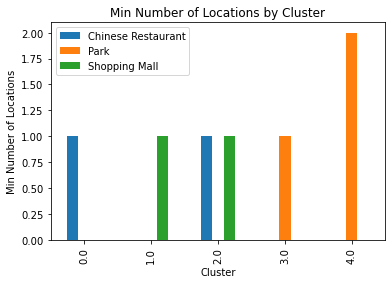

In [86]:
#create min bar plot 
cluster_min.plot(kind='bar')

plt.title('Min Number of Locations by Cluster')
plt.ylabel('Min Number of Locations')
plt.xlabel('Cluster')

plt.show()

In [91]:
#create dataframe of cluster 2 suburbs
filter = perth_merged['Cluster Labels']== 2
cluster2 = perth_merged[filter]
cluster2 = pd.DataFrame(cluster2, columns = ['Suburb','Chinese Restaurant', 'Park', 'Shopping Mall'])
cluster2.set_index('Suburb',inplace=True)
cluster2

,Chinese Restaurant,Park,Shopping Mall
Suburb,,,
Bull Creek,2.0,2.0,2.0
Cannington,3.0,1.0,1.0
East Victoria Park,3.0,1.0,1.0
Garden Island,1.0,1.0,2.0
Iluka,2.0,2.0,1.0
Northbridge,3.0,0.0,2.0
Perth City,2.0,1.0,2.0
Victoria Park,3.0,0.0,2.0


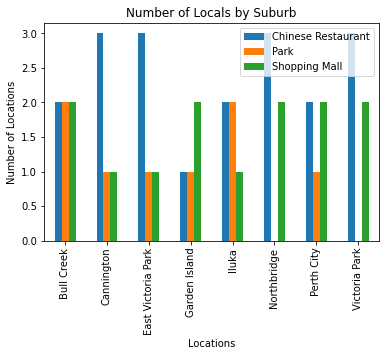

In [92]:
#create bar plot of cluster 2 suburbs
cluster2.plot(kind='bar')

plt.title('Number of Locals by Suburb')
plt.ylabel('Number of Locations')
plt.xlabel('Locations')

plt.show()

In [104]:
#create a filterred dataframe to get lats/longs of cluster 2
cluster2a = perth_merged[filter]
cluster2a = pd.DataFrame(cluster2a, columns = ['Suburb','Latitude', 'Longitude'])

address = 'Perth, Western Australia'

geolocator = Nominatim(user_agent="perth_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_bestsuburbs = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(cluster2a['Latitude'], cluster2a['Longitude'], cluster2a['Suburb']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_bestsuburbs)

map_bestsuburbs